# Breast Cancer Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_data(df):
  try:
    df = pd.read_csv(df)
  except:
    df = pd.read_excel(df)
  return df

df = load_data("/content/data.csv")

In [3]:
# displaying all the columns in the dataset
pd.set_option("display.max_columns", None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# droping unnecassary columns
df.drop(["Unnamed: 32", 'id'], axis = 1, inplace = True)

In [7]:
# checking for the missing values

df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [8]:
# mapping the value of our target variable

df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

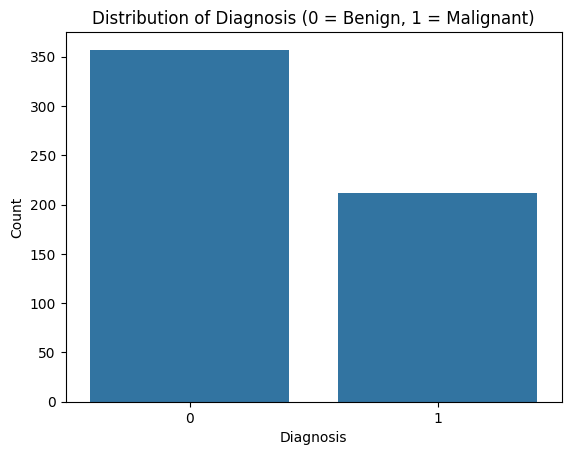

In [9]:
sns.countplot(df, x="diagnosis")
plt.title("Distribution of Diagnosis (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [10]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


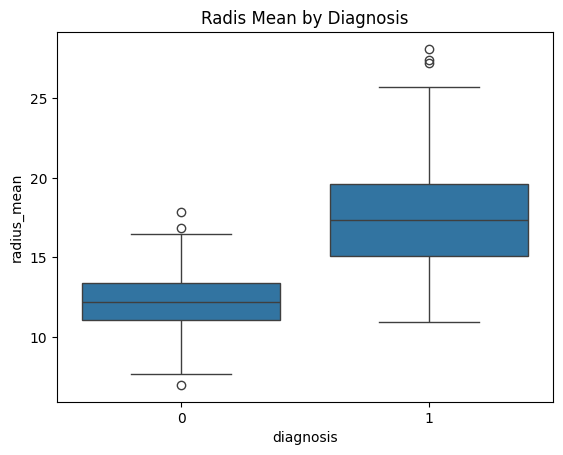

In [11]:
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = df)
plt.title('Radis Mean by Diagnosis')
plt.show()

<Axes: >

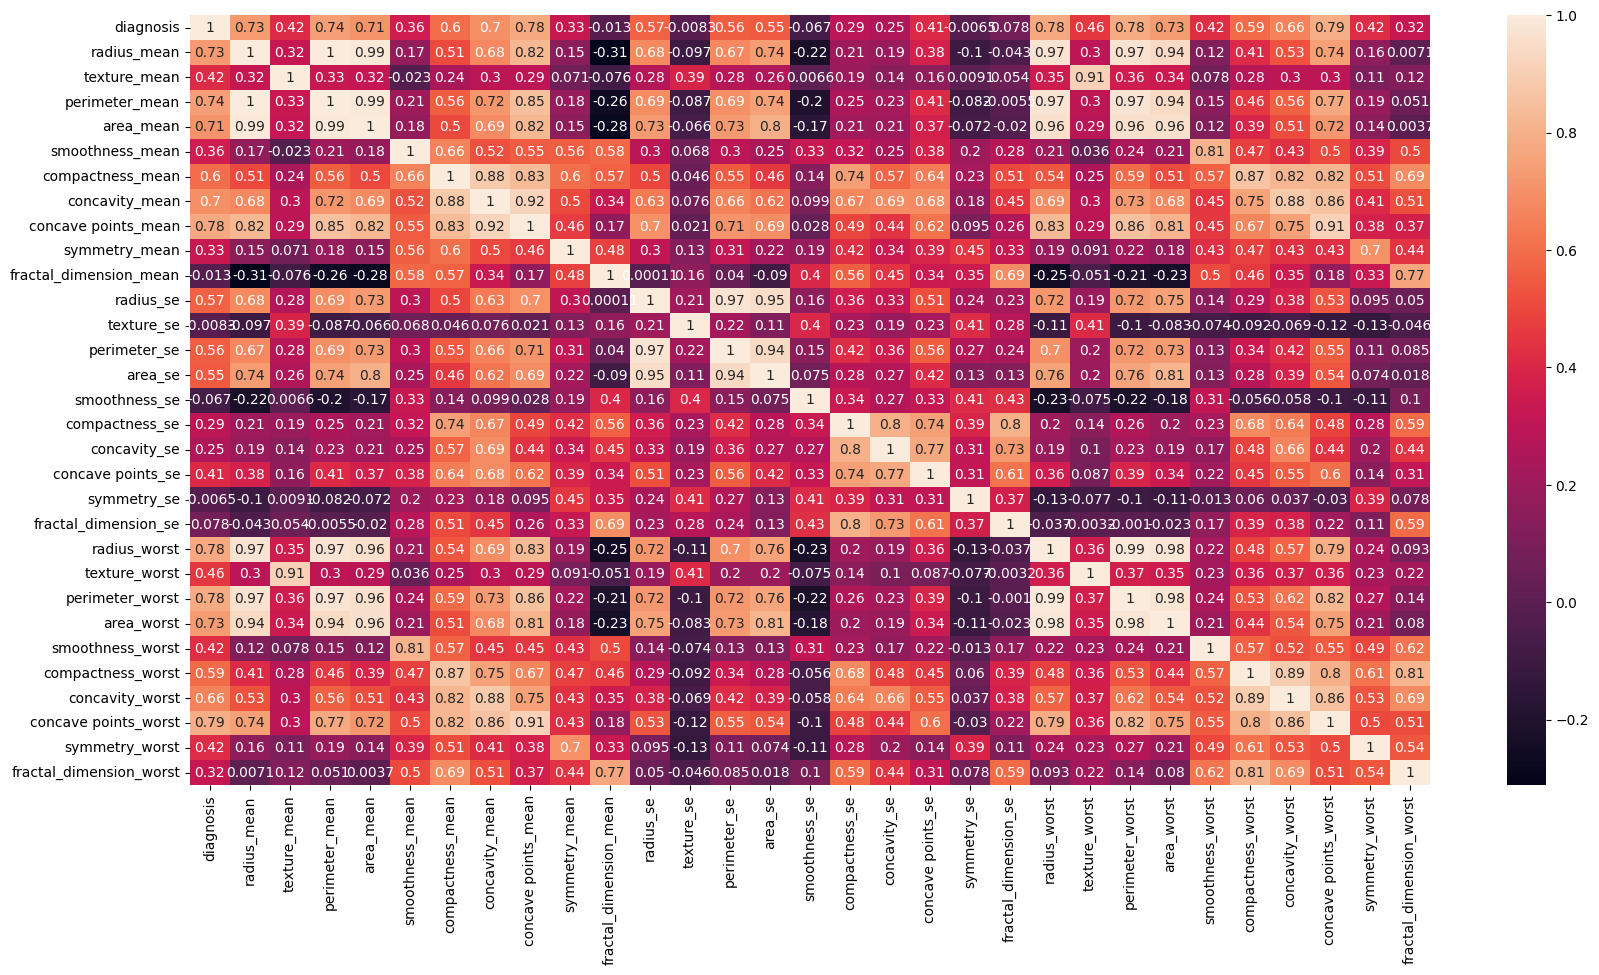

In [12]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

**There are some columns in the dataset that may produce multicollineraity so best practice is to remove from the dataset for the better accuracy.**

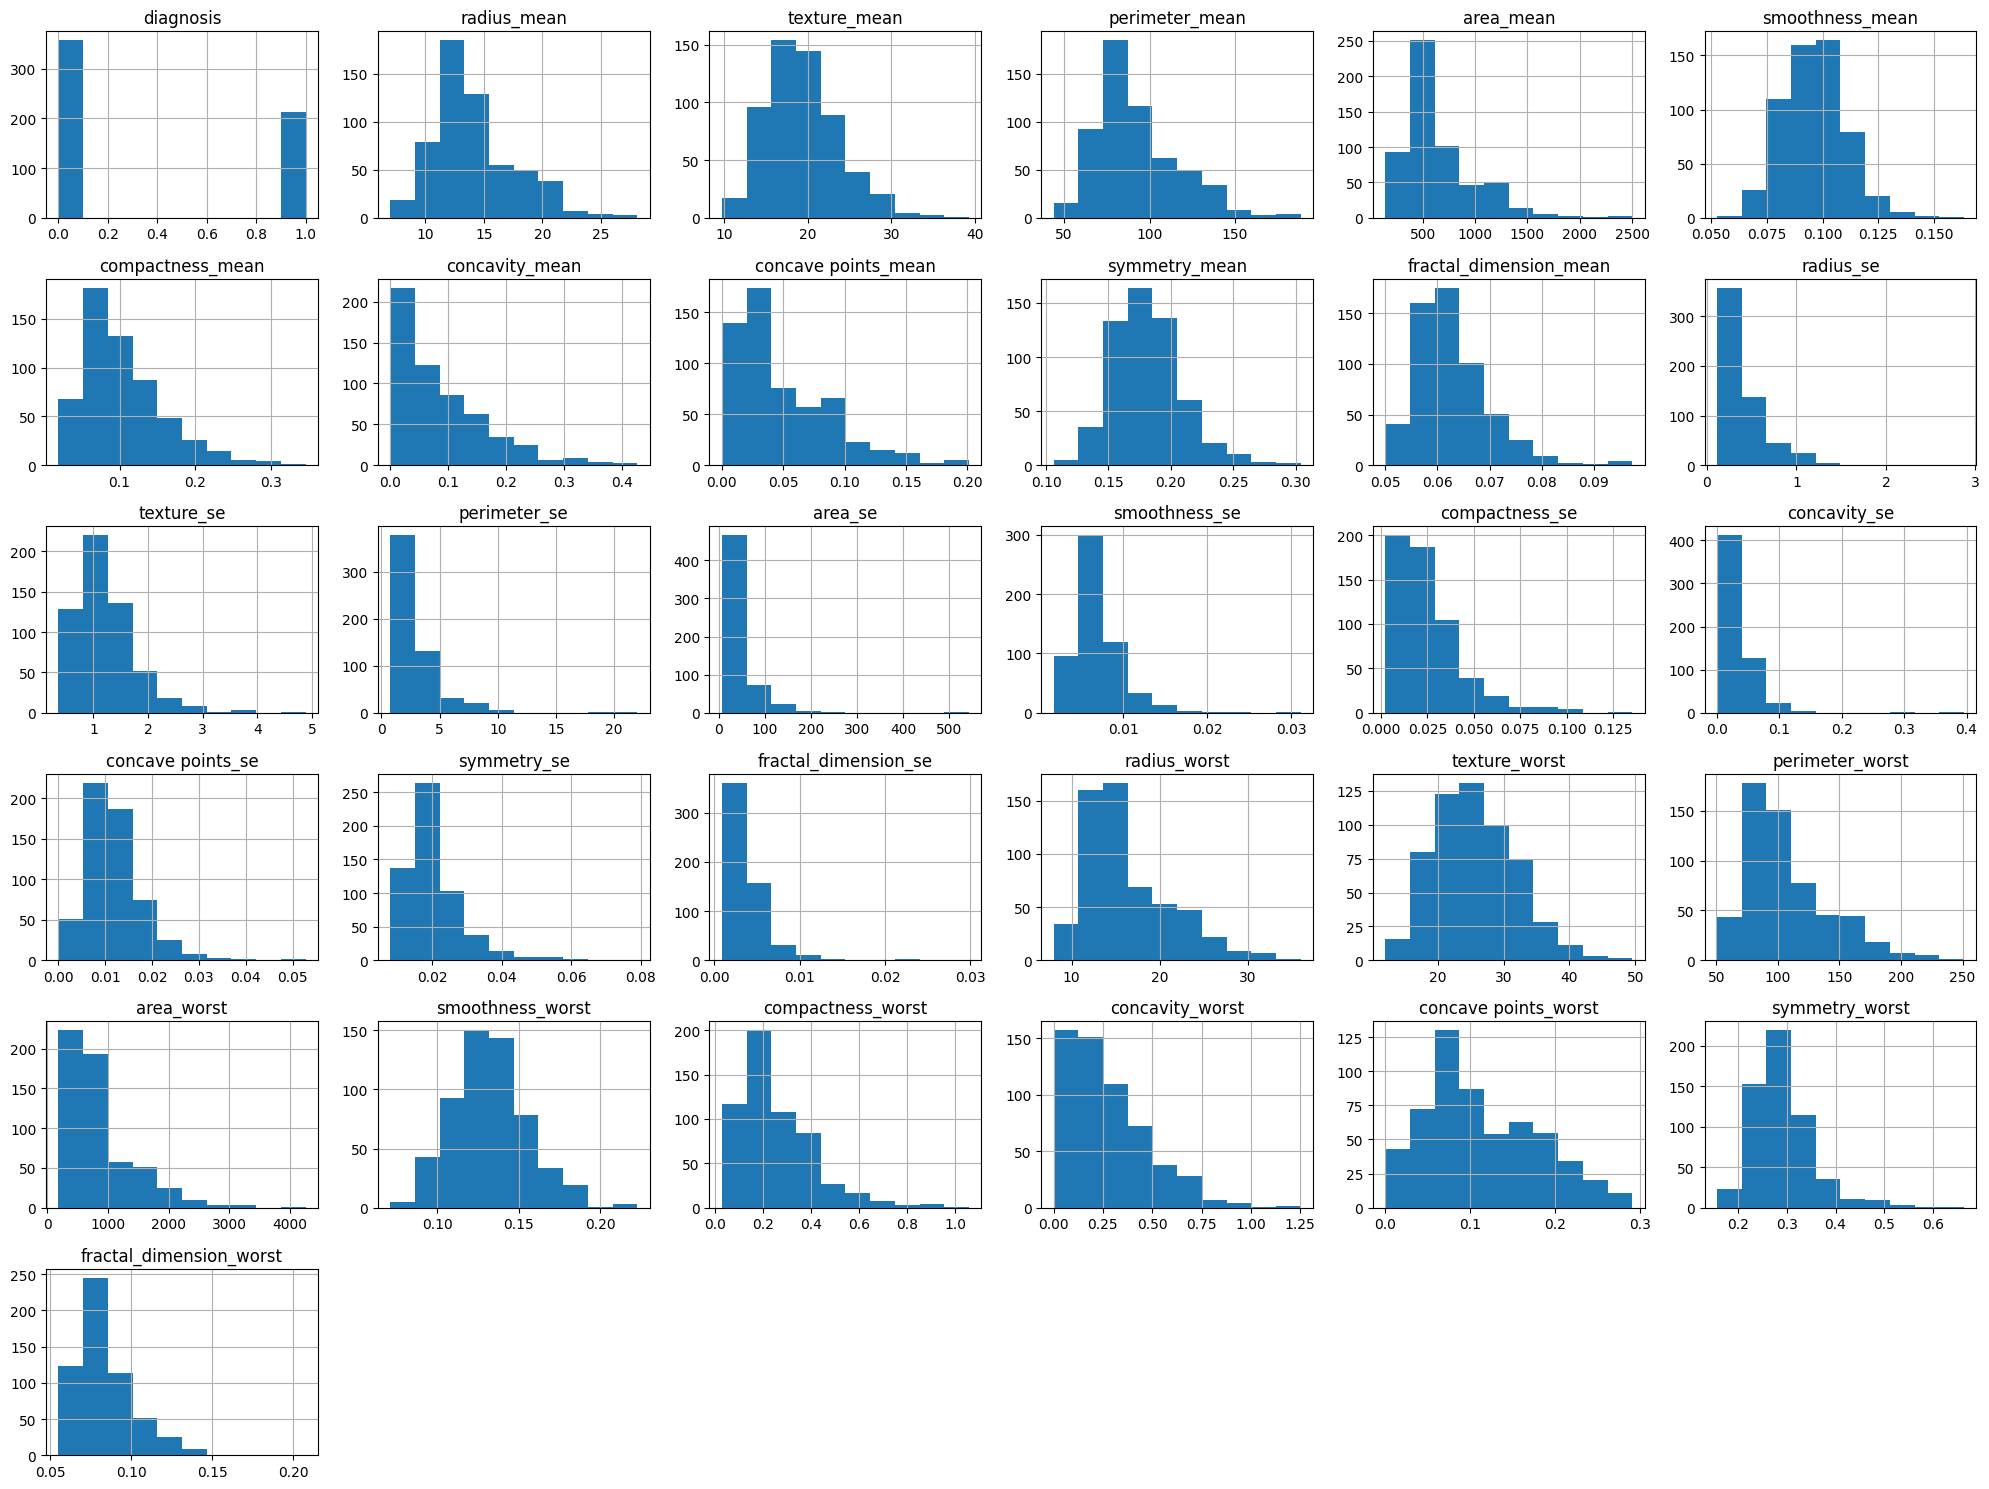

In [13]:
# Plot the distribution of each feature
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

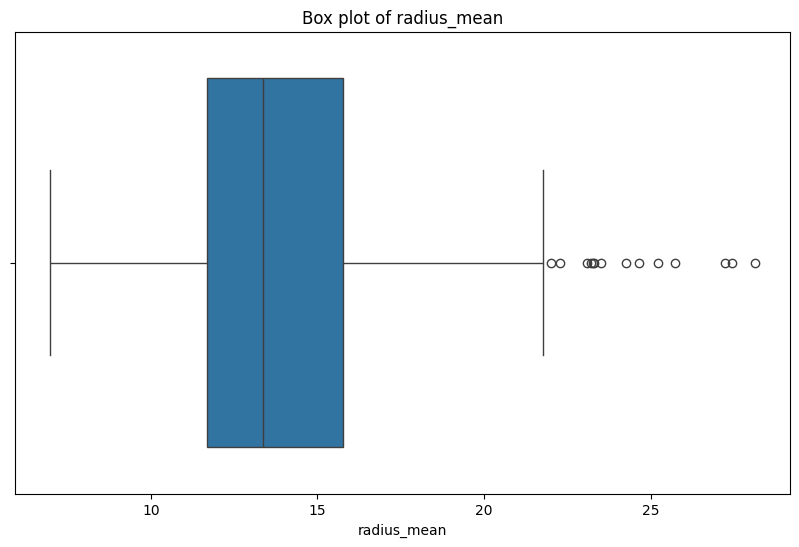

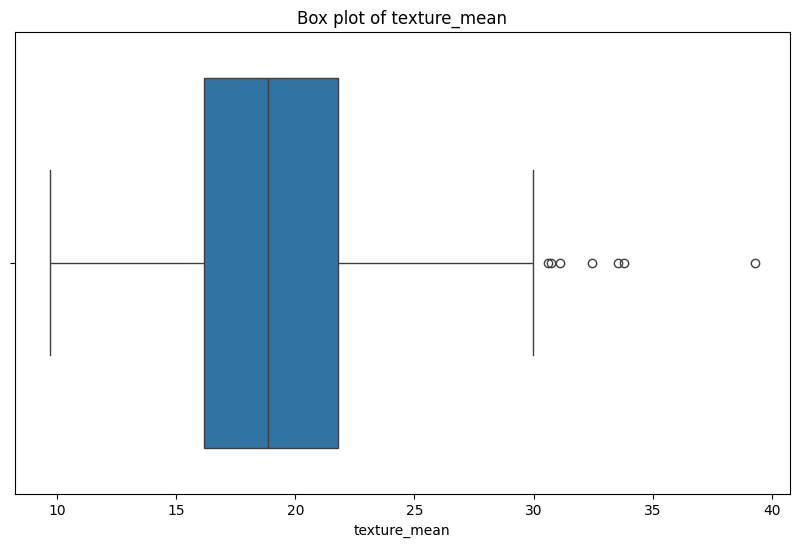

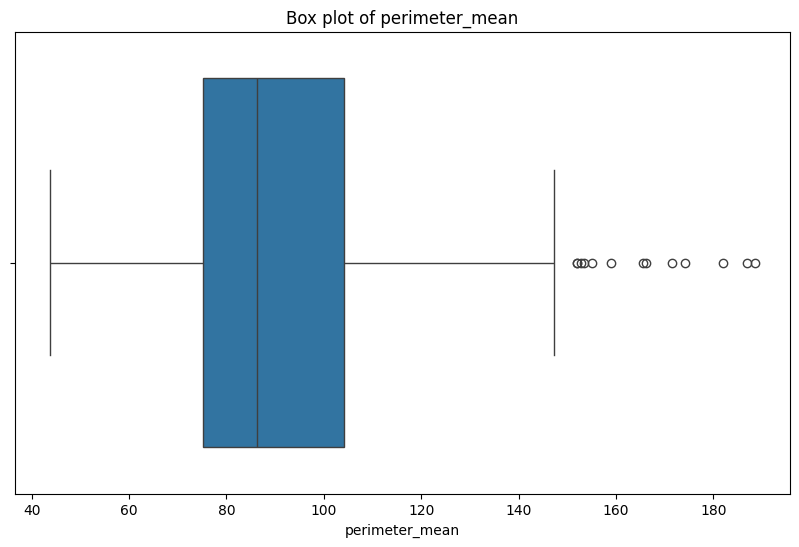

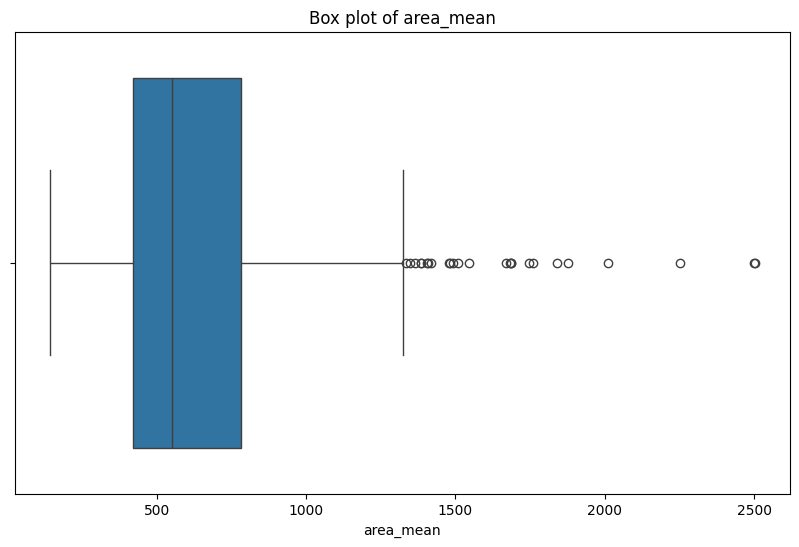

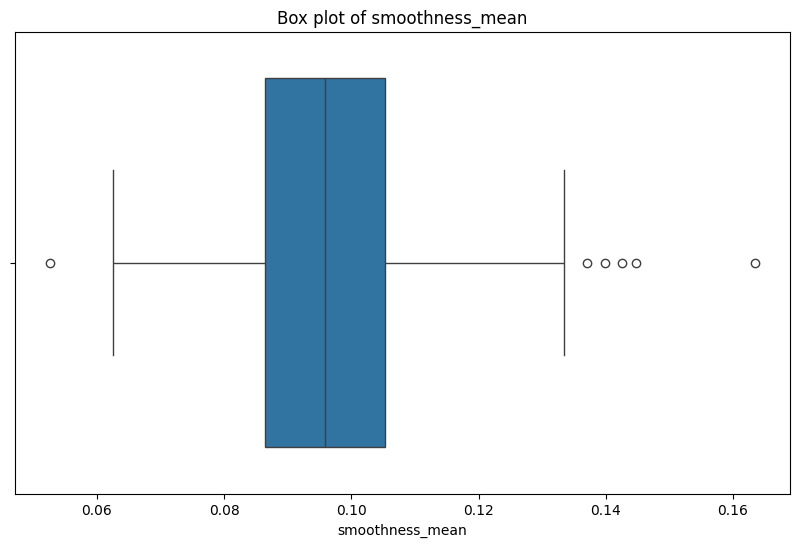

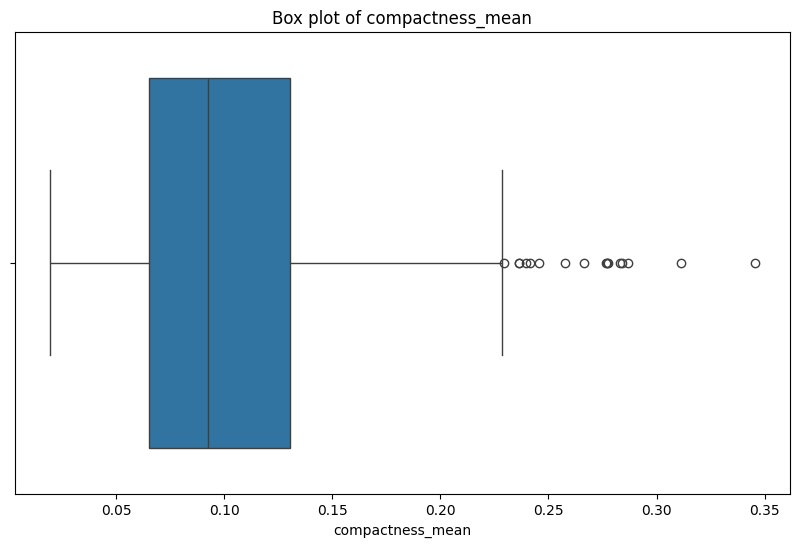

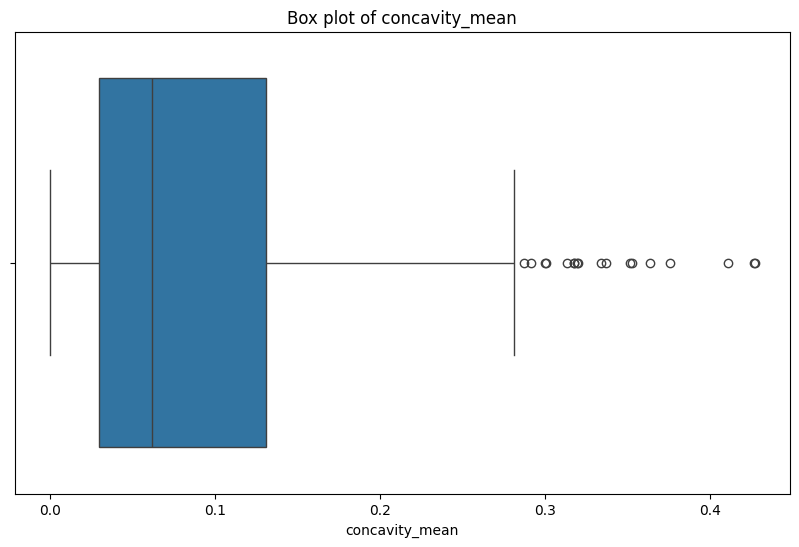

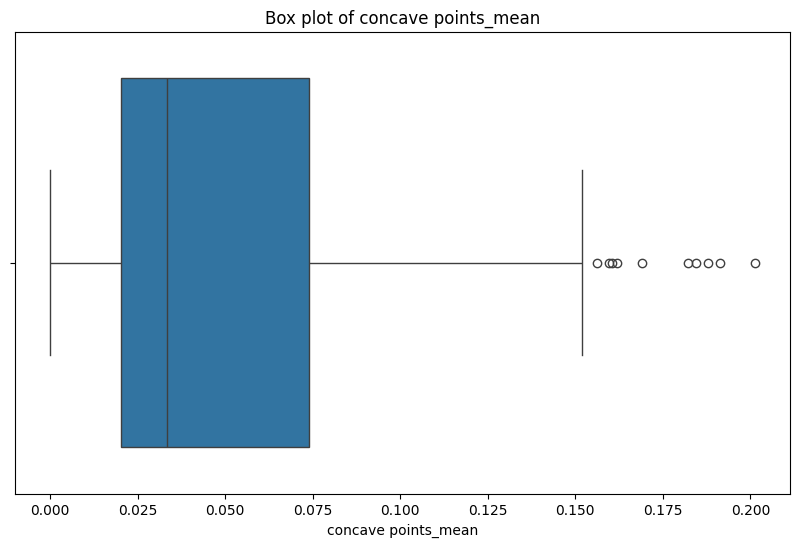

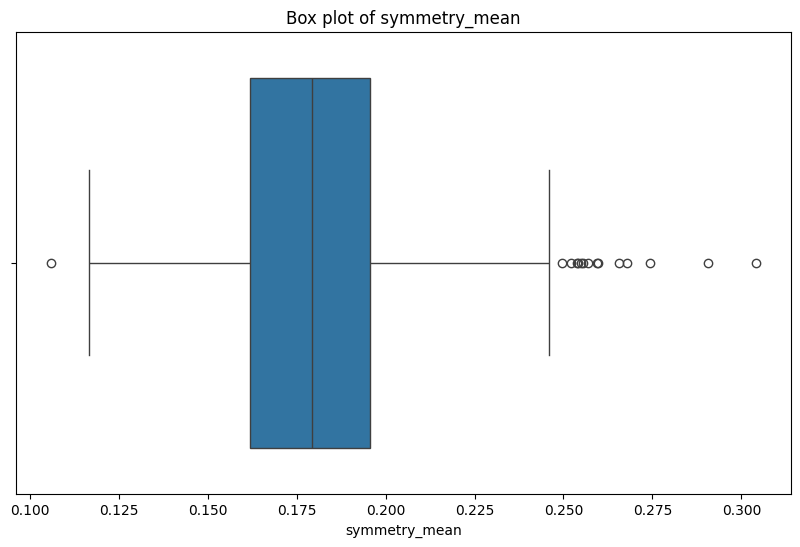

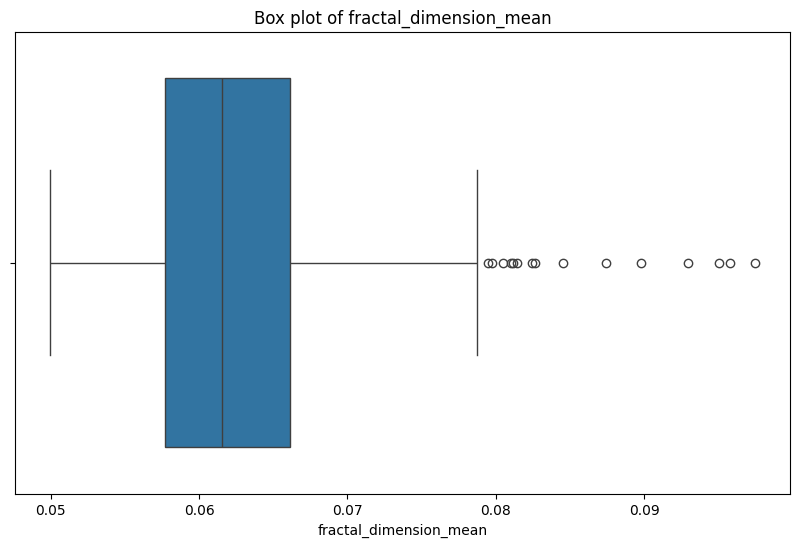

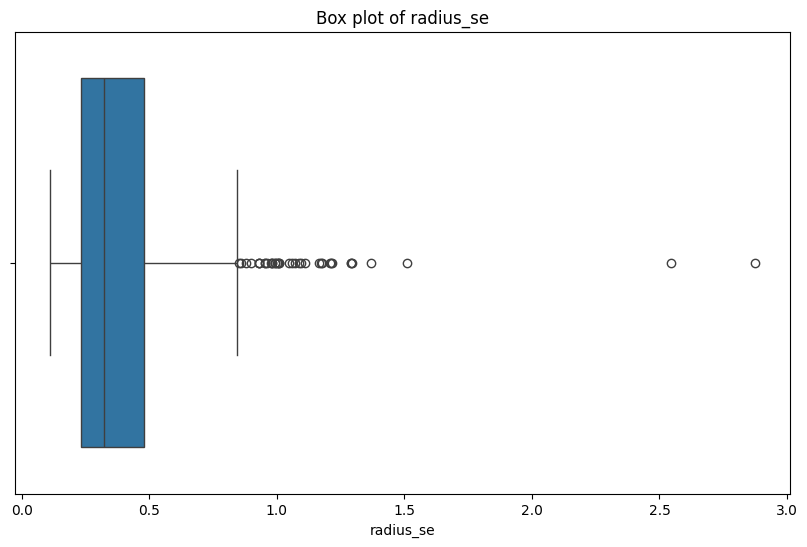

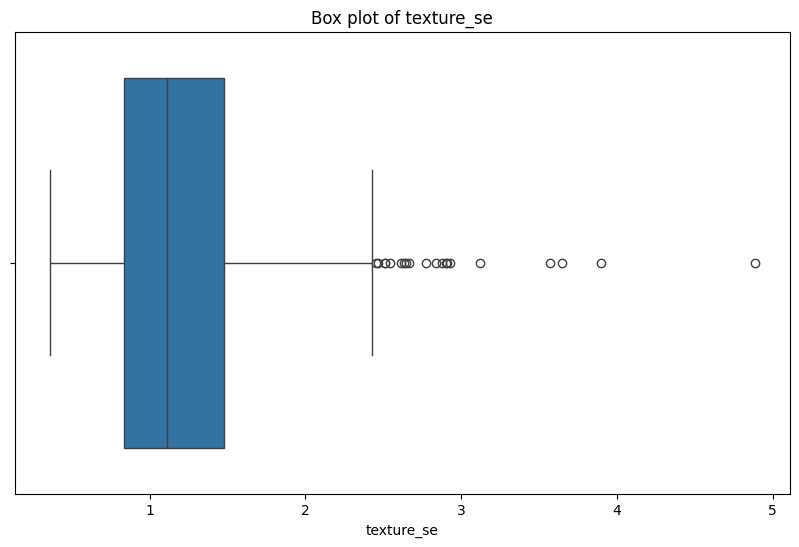

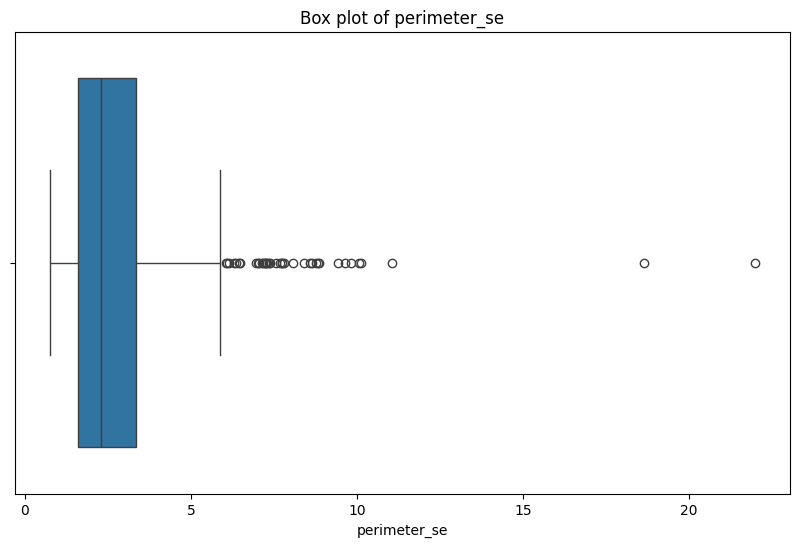

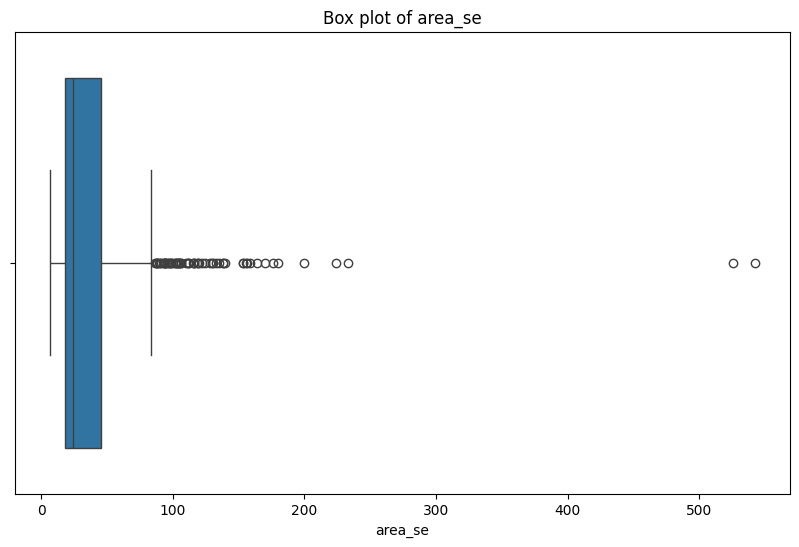

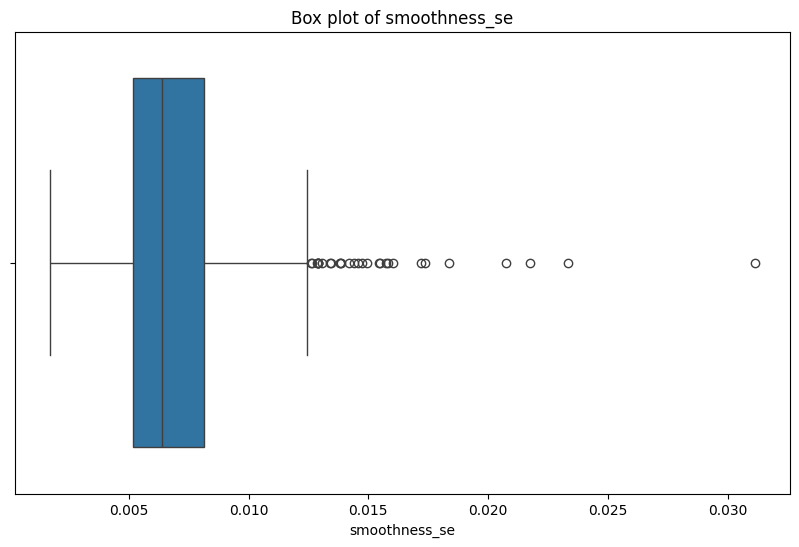

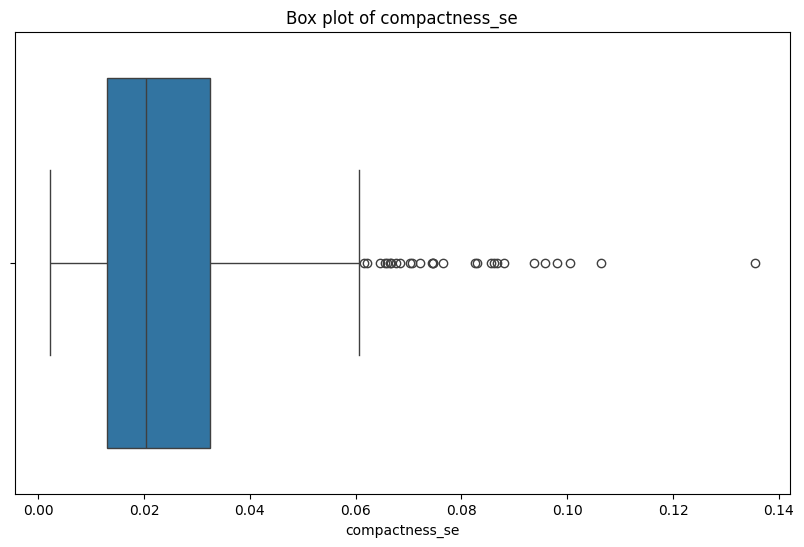

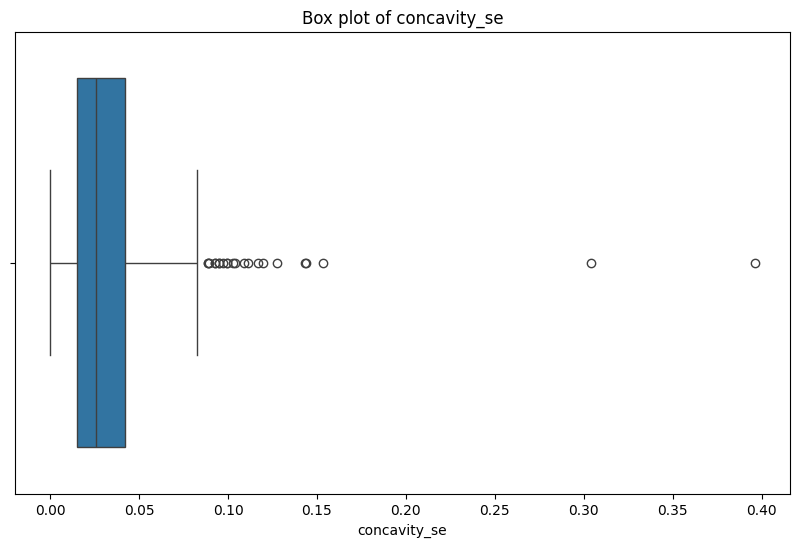

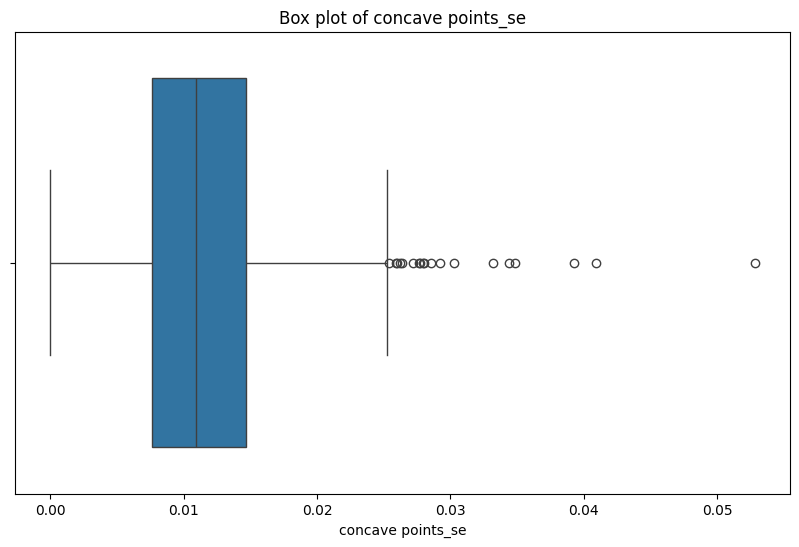

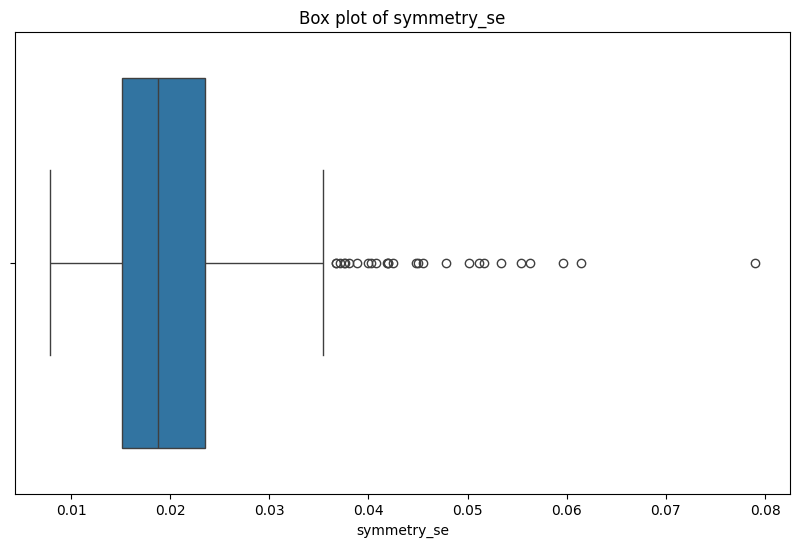

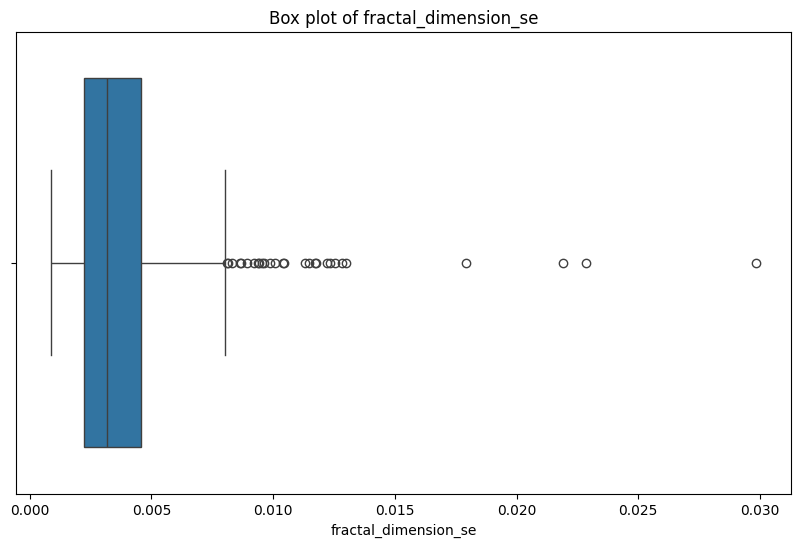

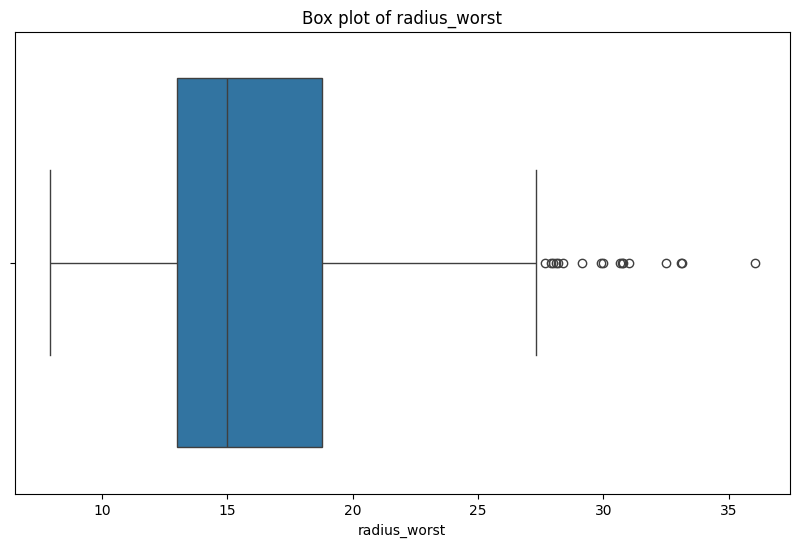

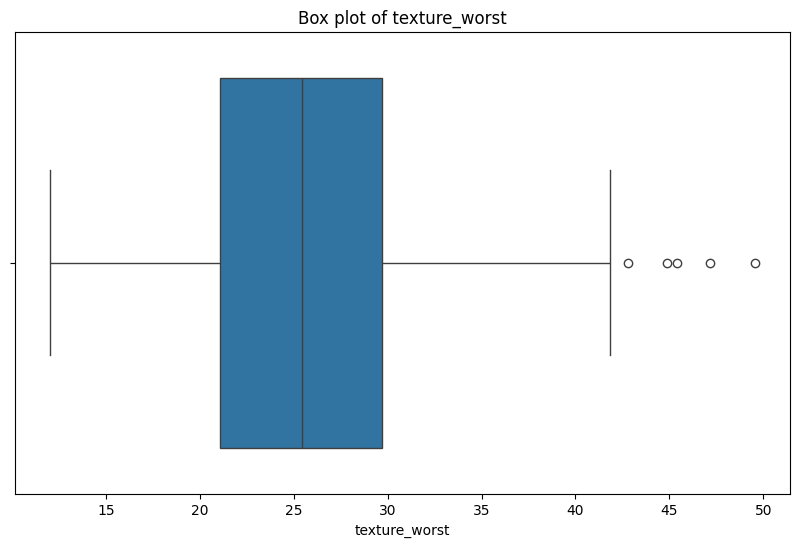

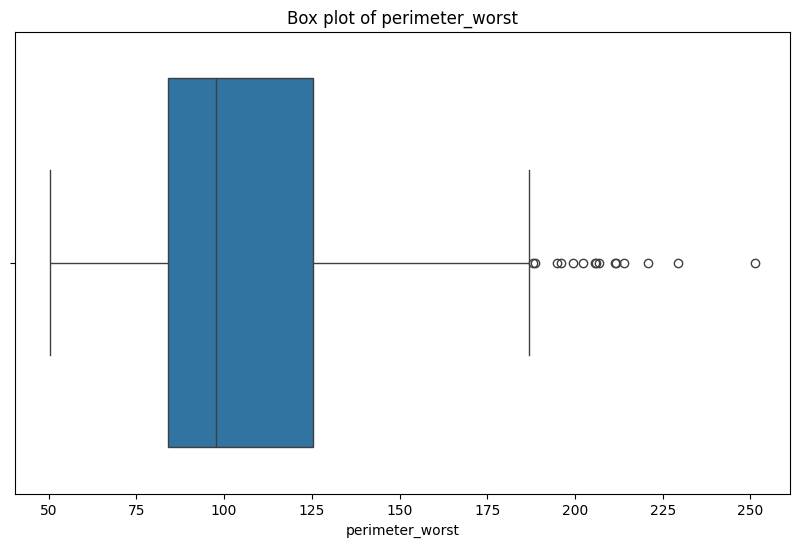

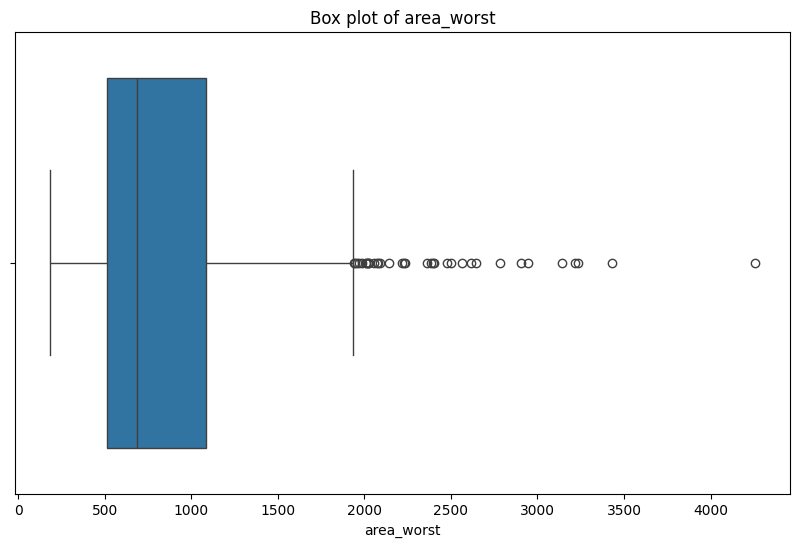

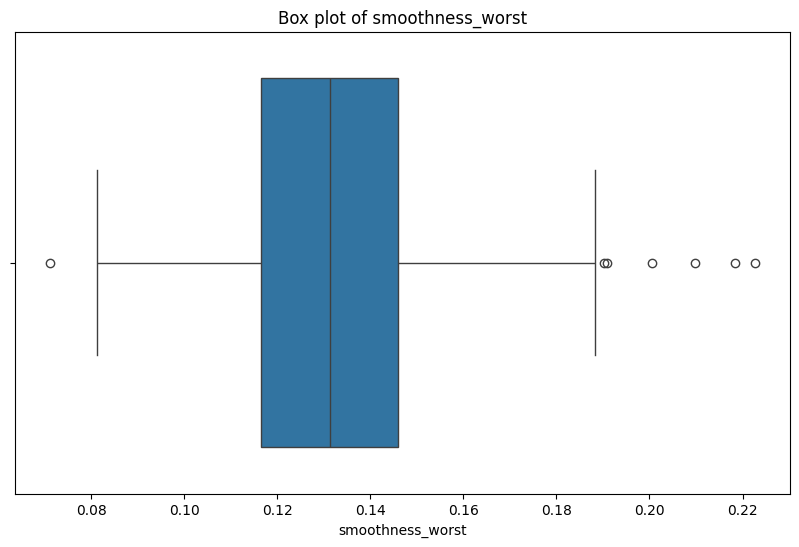

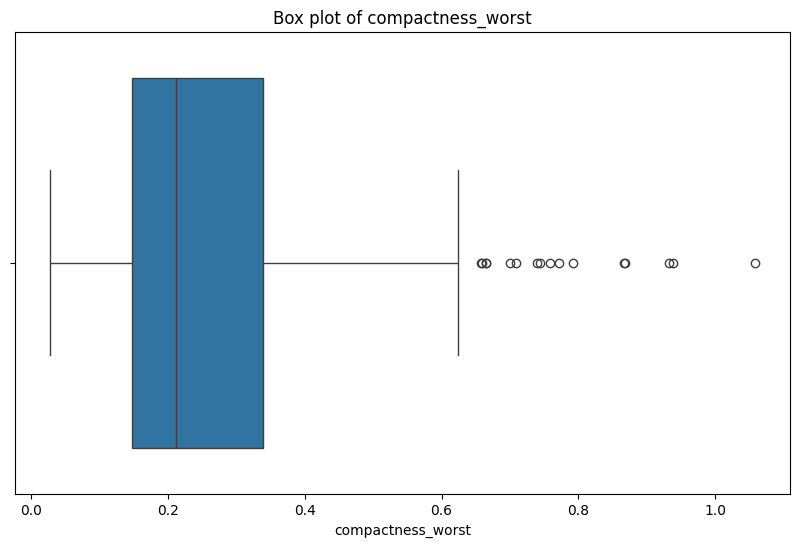

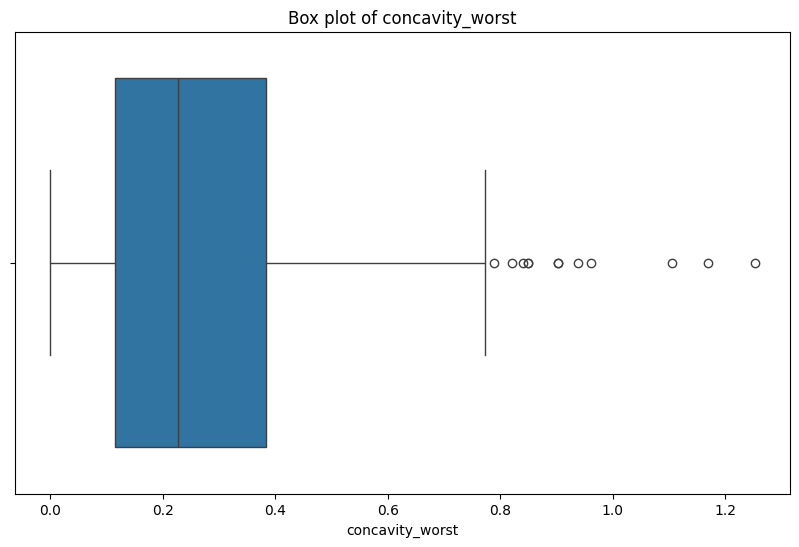

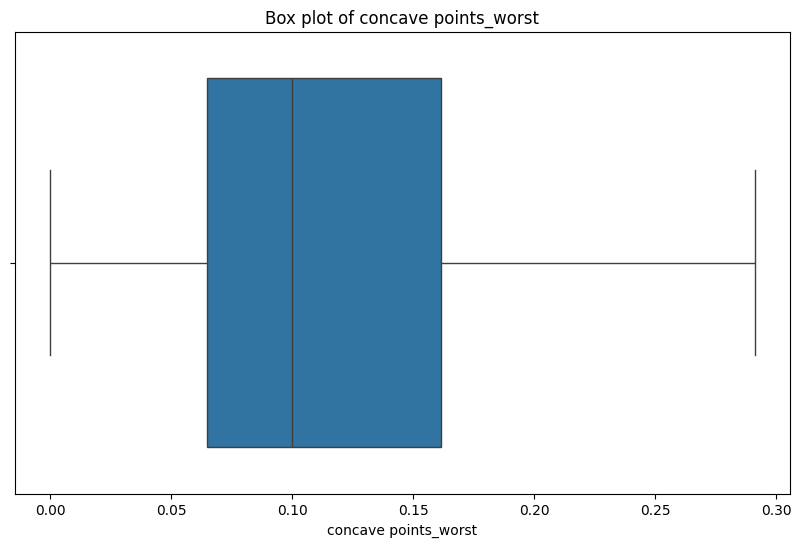

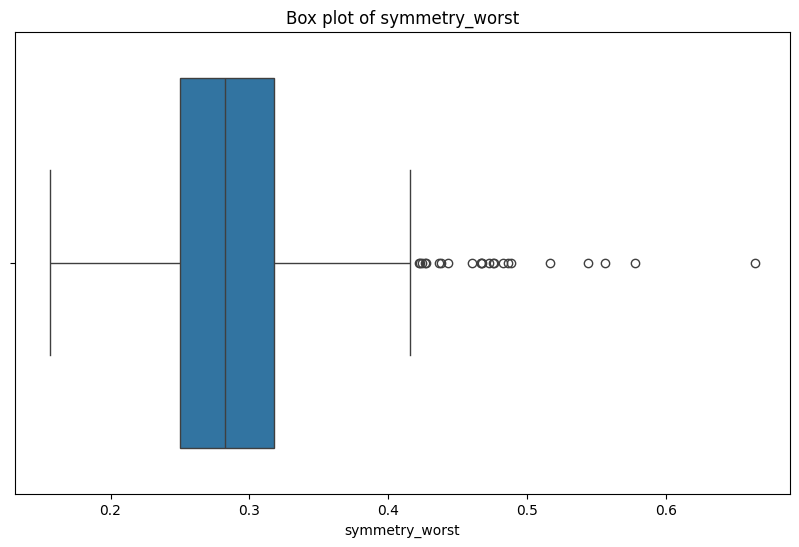

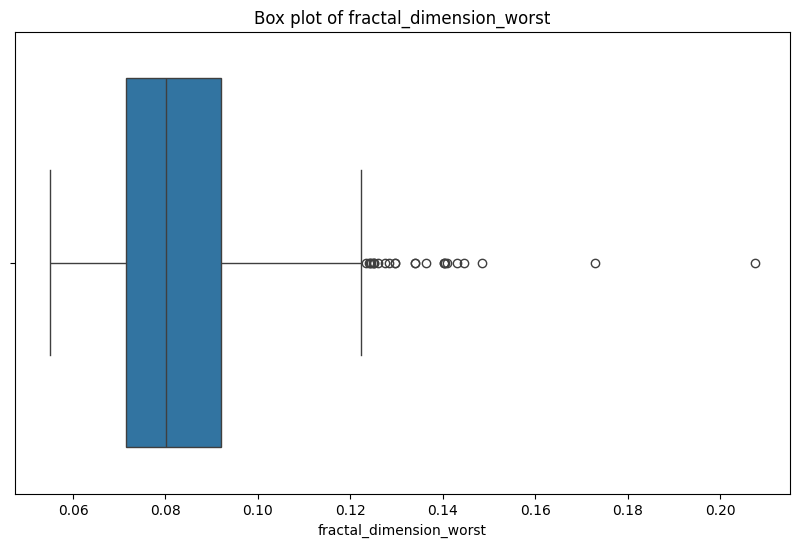

In [14]:
# Checking for outliers using boxplots
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('diagnosis') # Exclude the target variable

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

**AS we can see that there are outliers in the dataset so we have to fix this issue.**

In [15]:
# separate features and the target column

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [16]:
# removing multicollinear features

corr_matrix = X.corr().abs()

In [17]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
print("Dropped due to Multicollinearity: ", to_drop)

Dropped due to Multicollinearity:  ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [18]:
X.drop(to_drop, axis=1, inplace=True)

In [19]:
# data normalization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42, stratify =y)

In [21]:
# final shape of the dataset

print("Shape of X_train is: ", X_train.shape)
print("Shape of X_test is: ", X_test.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of X_train is:  (398, 23)
Shape of X_test is:  (171, 23)
Shape of y_train is:  (398,)
Shape of y_test is:  (171,)


# Model training

In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


results = {}

In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9649
Random Forest Accuracy: 0.9532
Support Vector Machine Accuracy: 0.9825
K-Nearest Neighbors Accuracy: 0.9649


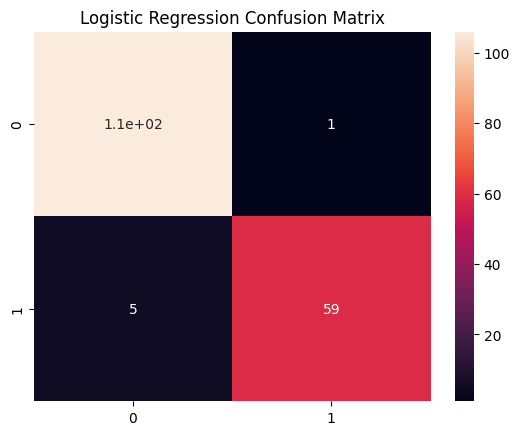

In [24]:
lgr = models["Logistic Regression"]
y_pred_lgr = lgr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lgr)
sns.heatmap(cm, annot=True)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

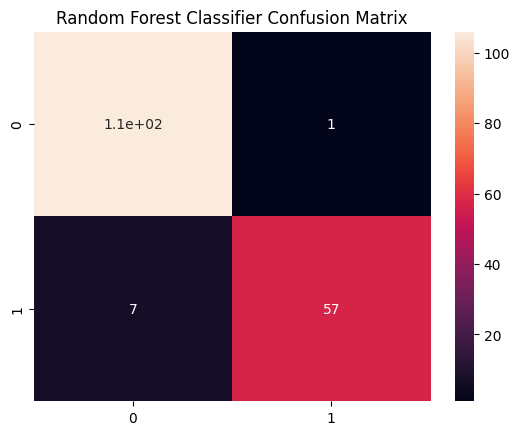

In [25]:
rfc = models["Random Forest"]
y_pred_rfc = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True)
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

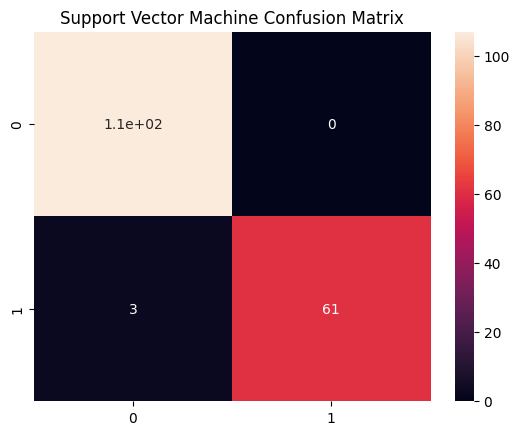

In [26]:
svc = models["Support Vector Machine"]
y_pred_svc = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True)
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

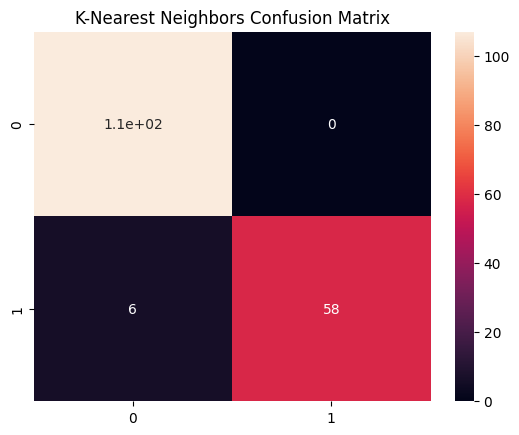

In [27]:
knn = models["K-Nearest Neighbors"]
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True)
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

In [28]:
print("Logistic Regression Classification Report: \n",classification_report(y_test, y_pred_lgr))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.92      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [29]:
print("Random Forest Classification Report: \n",classification_report(y_test, y_pred_rfc))

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [30]:
print("SVC Classification Report: \n", classification_report(y_test, y_pred_svc))

SVC Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [31]:
print("Knn Classification Report:\n",classification_report(y_test, y_pred_knn))

Knn Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



# ROC Curve for logistic Regression

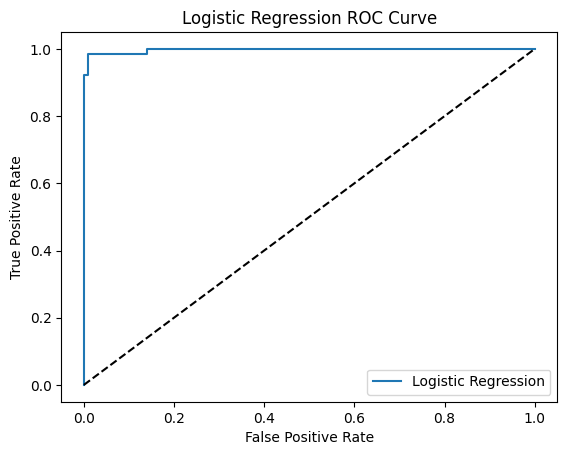

In [32]:
lr = models["Logistic Regression"]

pred_prob = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()


# Feature importance for Random Forest

In [33]:
importance = rfc.feature_importances_
features = X.columns
top_feature = pd.Series(importance, index = features).sort_values(ascending = False)[:3]
print("Top 3 Features are: ", top_feature)


Top 3 Features are:  radius_mean             0.172855
concave points_mean     0.164968
concave points_worst    0.163496
dtype: float64


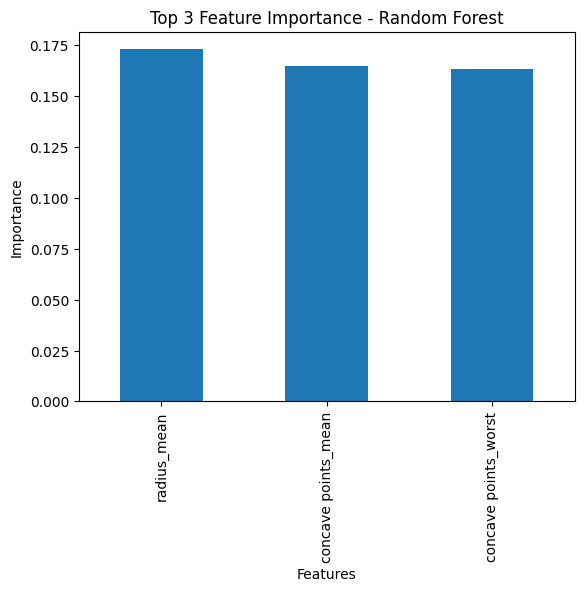

In [34]:
top_feature.plot(kind = "bar")
plt.title("Top 3 Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# 5 Cross Validation Score

In [35]:
svc = models["Support Vector Machine"]
scores = cross_val_score(svc, X_scaled, y, cv=5)
print("SVC Cross-Validation Accuracy: %.4f (+/- %.4f)" % (scores.mean(), scores.std()))


SVC Cross-Validation Accuracy: 0.9719 (+/- 0.0129)


# Model Save

In [36]:
import pickle
with open("best_model_svc.pkl", "wb") as f:
    pickle.dump(svc, f)